# FINAL TASK PROJECT BASED INTERNSHIP IDX PARTNERS DS:<br>BUILD A PREDICTION MODEL TO PREDICT THE CLIENT CREDIT WORTHINESS

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Load Data & Premilinary Data Analysis

In [93]:
# Read the CSV file into a DataFrame(dfloan)
dfloan = pd.read_csv('../data/loan_data_2007_2014.csv', low_memory=False)

# Select th ecolumns of dfoan that have object dtype and store them in categoric
categoric = dfloan.select_dtypes('object')

# Seelct the columns of dfloan that have number dtype and store them in numeric
numeric = dfloan.select_dtypes('number')

# Assign the number of rows and columns to rows and cols variables
rows = dfloan.shape[0]
cols = dfloan.shape[1]

# Print the shape of dfloan
print(f'dfloan Rows: {rows}\ndfloan Columns: {cols}')

# Print sample of 6 rows from dfloan
print('\nData sample showcase:')
display(dfloan.sample(6))

# Print statistical summary of the cateogircal data in dfloan
print('\nCategorical data statistical summary:')
display(categoric.describe())

# Print statistical summary of the numerical data in dfloan
print('\nNumerical data statistical summary:')
display(numeric.describe())

dfloan Rows: 466285
dfloan Columns: 75

Data sample showcase:


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
416112,416112,12565369,14577522,8775,8775,8775.0,36 months,14.16,300.60,C,C2,NaN,NaN,OWN,25000.0,Verified,Apr-14,In Grace Period,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,350xx,AL,12.75,1.0,Oct-69,2.0,9.0,NaN,9.0,0.0,7769,40.3,22.0,w,4362.26,4362.26,6012.00000,6012.00,4412.74,1599.26,0.00,0.0,0.0,Dec-15,300.60,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,7854.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19300.0,NaN,NaN,NaN
332374,332374,23483028,25835979,25000,25000,25000.0,60 months,16.29,611.82,D,D2,caseworker,10+ years,MORTGAGE,70764.0,Verified,Aug-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,606xx,IL,26.71,0.0,Nov-03,0.0,NaN,NaN,21.0,0.0,10504,20.6,39.0,w,19829.63,19829.63,10400.94000,10400.94,5170.37,5230.57,0.00,0.0,0.0,Jan-16,611.82,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,1175.0,254503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51000.0,NaN,NaN,NaN
270123,270123,32379012,34992242,15000,15000,15000.0,36 months,7.69,467.91,A,A4,NaN,NaN,MORTGAGE,60000.0,Source Verified,Oct-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,982xx,WA,7.21,0.0,Nov-84,1.0,NaN,77.0,10.0,1.0,12044,17.0,18.0,w,0.00,0.00,15817.13000,15817.13,15000.00,817.13,0.00,0.0,0.0,Jul-15,12086.67,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,12044.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70800.0,NaN,NaN,NaN
212197,212197,1362909,1606893,10000,10000,10000.0,36 months,12.12,332.72,B,B3,NYC department of education,7 years,RENT,35000.0,Not Verified,Jun-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 06/15/12 > I'm appling for...,credit_card,Credit card refinancing,112xx,NY,20.38,1.0,Oct-99,0.0,12.0,NaN,12.0,0.0,10793,24.9,28.0,f,0.00,0.00,11976.69205,11976.69,10000.00,1976.69,0.00,0.0,0.0,Jul-15,336.05,NaN,Jun-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384085,384085,16942661,19065196,15000,15000,15000.0,60 months,14.99,356.78,C,C5,backflow technician,10+ years,OWN,51000.0,Source Verified,May-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,137xx,NY,11.37,1.0,May-85,0.0,6.0,NaN,13.0,0.0,19351,57.6,24.0,f,11397.73,11397.73,6814.50000,6814.50,3602.27,3176.55,35.68,0.0,0.0,Dec-15,356.78,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,19351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33600.0,NaN,NaN,NaN
283163,283163,30805755,33358923,10950,10950,10950.0,60 months,16.29,267.98,D,D2,Data Entry,3 years,RENT,40000.0,Source Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,920xx,CA,28.74,0.0,Apr-00,0.0,NaN,NaN,9.0,0.0,6018,17.7,14.0,w,8979.47,8979.47,3999.88000,3999.88,1970.53,2029.35,0.00,0.0,0.0,Jan-16,267.98,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,23515.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Categorical data statistical summary:


,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,125981,466285,466264,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,124435,14,63098,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,234,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285



Numerical data statistical summary:


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [98]:
dfloan.acc_now_delinq.value_counts()

acc_now_delinq
0.0    464524
1.0      1623
2.0        92
3.0        11
4.0         4
5.0         2
Name: count, dtype: int64

from the above categorical columns statistical summary, i found that there's column with too many unique values and there's column with 1 unique value, for 
findings : 
- `url` column contains too many unique values, and we will drop them later
- `desc` column contains too many unique values, and we will drop them later
- `title` column contains too many unique values, and we will drop them later
- `pymnt_plan` column is a binary column and it's very imbalanced, n: 99.9% and y: 0.00005%, we will drop this column later
- `application` column only have 1 unique value, the data values don't have any variance, we will drop this column later
- `zip_code` column contains too many unique values, and we will drop them later and i don't think it's important for our analysis
- `addr_state` i'm about to generalize this column to region, so i will keep this column for now
- `policy_code` column only have 1 unique value, the data values don't have any variance, we will drop this column later
- `acc_now_delinq` column is a categorical column with value range from 0 - 5 and it's very imbalanced, 0: 99.9%, because of the 0 values is too much this coluumn considered only have 1 unique value, we will drop this column later 

### Mising Values checking

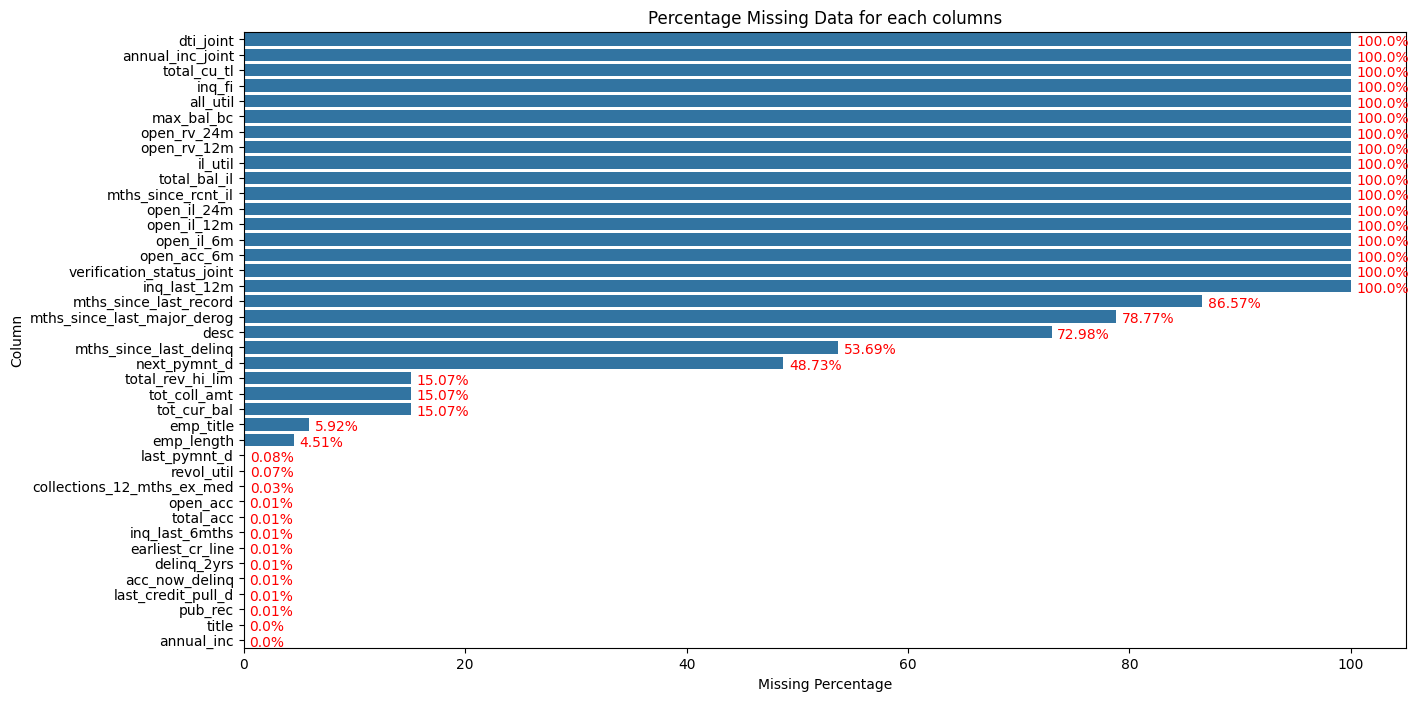

In [50]:
# Calculate the percentage of missing values in each column of dfloan
missing = (dfloan.isnull().sum() / len(dfloan)) * 100

# Filer out the columns that have no missing values
missing = missing[missing > 0]

# Create a DataFrame from the missing data
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing %': np.round(missing.values, 2) # Round the missing percentage to 2 decimal places
}) 

# Sorth the DataFrame by the percentage of missing values in descending order
missing_df = missing_df.sort_values('Missing %', ascending=False)


# Create a bar plot of the missing data
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Missing %', y='Column', data=missing_df)

# Add the percentage of missing data as text on the bars
for i, v in enumerate(missing_df['Missing %']):
    ax.text(v + 0.5, i + .4, str(v) + '%', color='red')

# Set the labels and title of the plot
ax.set_xlabel('Missing Percentage')
ax.set_title('Percentage Missing Data for each columns')

# Display the plot
plt.show()

In [58]:
# Count the number of rows in missing_df where 'Missing %' is greater than 40
len(missing_df[missing_df['Missing %'] > 40])

22

- The data contains a lot of missing values, there's 22 columns that contains missing values more than 40% of the data, for this columns i decided to drop them later because it's too much missing values, and i think it's not valid.

- For the rest of the columns i will consider to fill(impute), drop them after i do furhter analysis on the data.

### Duplicate Values Checking

In [71]:
# print the number of duplicated rows in dfloan
print(dfloan.duplicated().sum())

0


Our data not contains any duplicate values, so we don't need to drop any duplicate values.

### Outlier Checking
This outlier checking it's just a simple checking, because we want to make a scorecard model, outlier can be sensitive to outliers in the data. Outliers can skew the model's parameter estimates, leading to less accurate predictions.

In [94]:
# drop the specified columns from the numeric DataFrame
numeric_dropped = numeric.drop(columns=['id', 'member_id', 'Unnamed: 0', 'policy_code', 'acc_now_delinq', 'collections_12_mths_ex_med', ])

# Calculate the percentage of missing values in each column
num_mis = (numeric_dropped.isna().sum() / len(dfloan) * 100)

# filter out the columns that have less than 0.4% missing values
low_missing_num = num_mis[num_mis < 0.4]

numeric = numeric.loc[:, low_missing_num.index]
numeric

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1,0.0
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1,0.0
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1,0.0
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1,0.0
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,14.47,432.64,110000.0,19.85,0.0,2.0,18.0,0.0,23208,77.6,36.0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,432.64,0.0,1,0.0
466281,22000,22000,22000.0,19.97,582.50,78000.0,18.45,0.0,5.0,18.0,1.0,18238,46.3,30.0,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,17.50,0.0,1,0.0
466282,20700,20700,20700.0,16.99,514.34,46000.0,25.65,0.0,2.0,18.0,0.0,6688,51.1,43.0,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,514.34,0.0,1,0.0
466283,2000,2000,2000.0,7.90,62.59,83000.0,5.39,3.0,1.0,21.0,0.0,11404,21.5,27.0,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,1500.68,0.0,1,0.0


`delinq_2yrs` -> binning

In [100]:
dfloan.inq_last_6mths.value_counts()

delinq_2yrs
0.0     382954
1.0      56224
2.0      16310
3.0       5684
4.0       2378
5.0       1236
6.0        629
7.0        346
8.0        177
9.0        111
10.0        65
11.0        41
12.0        38
13.0        25
14.0         8
15.0         7
18.0         6
16.0         5
17.0         3
19.0         3
21.0         2
22.0         2
29.0         1
24.0         1
Name: count, dtype: int64

In [96]:
dfloan.acc_now_delinq.value_counts()

acc_now_delinq
0.0    464524
1.0      1623
2.0        92
3.0        11
4.0         4
5.0         2
Name: count, dtype: int64

In [12]:

# map the loan status to default and not default or not
map_lstatus = {
    'Current': 'Not Default',
    'Fully_paid': 'Not Default',
    'Charged Off': 'Default',
    'Late (31-120 days)': 'Default',
    'In Grace Period': 'Default',
    'Does not meet the credit policy. Status:Fully Paid': 'Not Default',
    'Late (16-30 days)': 'Default',
    'Default': 'Default',
    'Does not meet the credit policy. Status:Charged Off': 'Default'
}
dfloan['loan_status'] = dfloan['loan_status'].map(map_lstatus)

In [9]:
dfloan

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,NaN,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Default,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,NaN,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,NaN,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Not Default,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Not Default,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,A